In [106]:
import os
import kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (classification_report, 
                             confusion_matrix, f1_score, 
                             accuracy_score, precision_score,
                             roc_auc_score, roc_auc_score)


In [82]:
import warnings
warnings.filterwarnings('ignore')

### Load dataset from the path
- path/application_data.csv

In [83]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

# stored in the RAM
df = pd.read_csv(os.path.join(path ,'creditcard.csv'))
df.head(2)

Path to dataset files: C:\Users\devid\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


### Data for the transactions that have Defaulted on Loans
- 0 --> Loan was PAID back
- 1 ---> Load was DEFAULTED - Not Paid Back

### Data Exploration
- we will try to check if the data is good for the problem solution
- Generally Fraud detection datasets, have skewed class balance
    - i.e. we do not have a lot of data on people that default on the Loan

- 

In [84]:
df.shape # ---> (284807, 31)

# Check the class balance
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

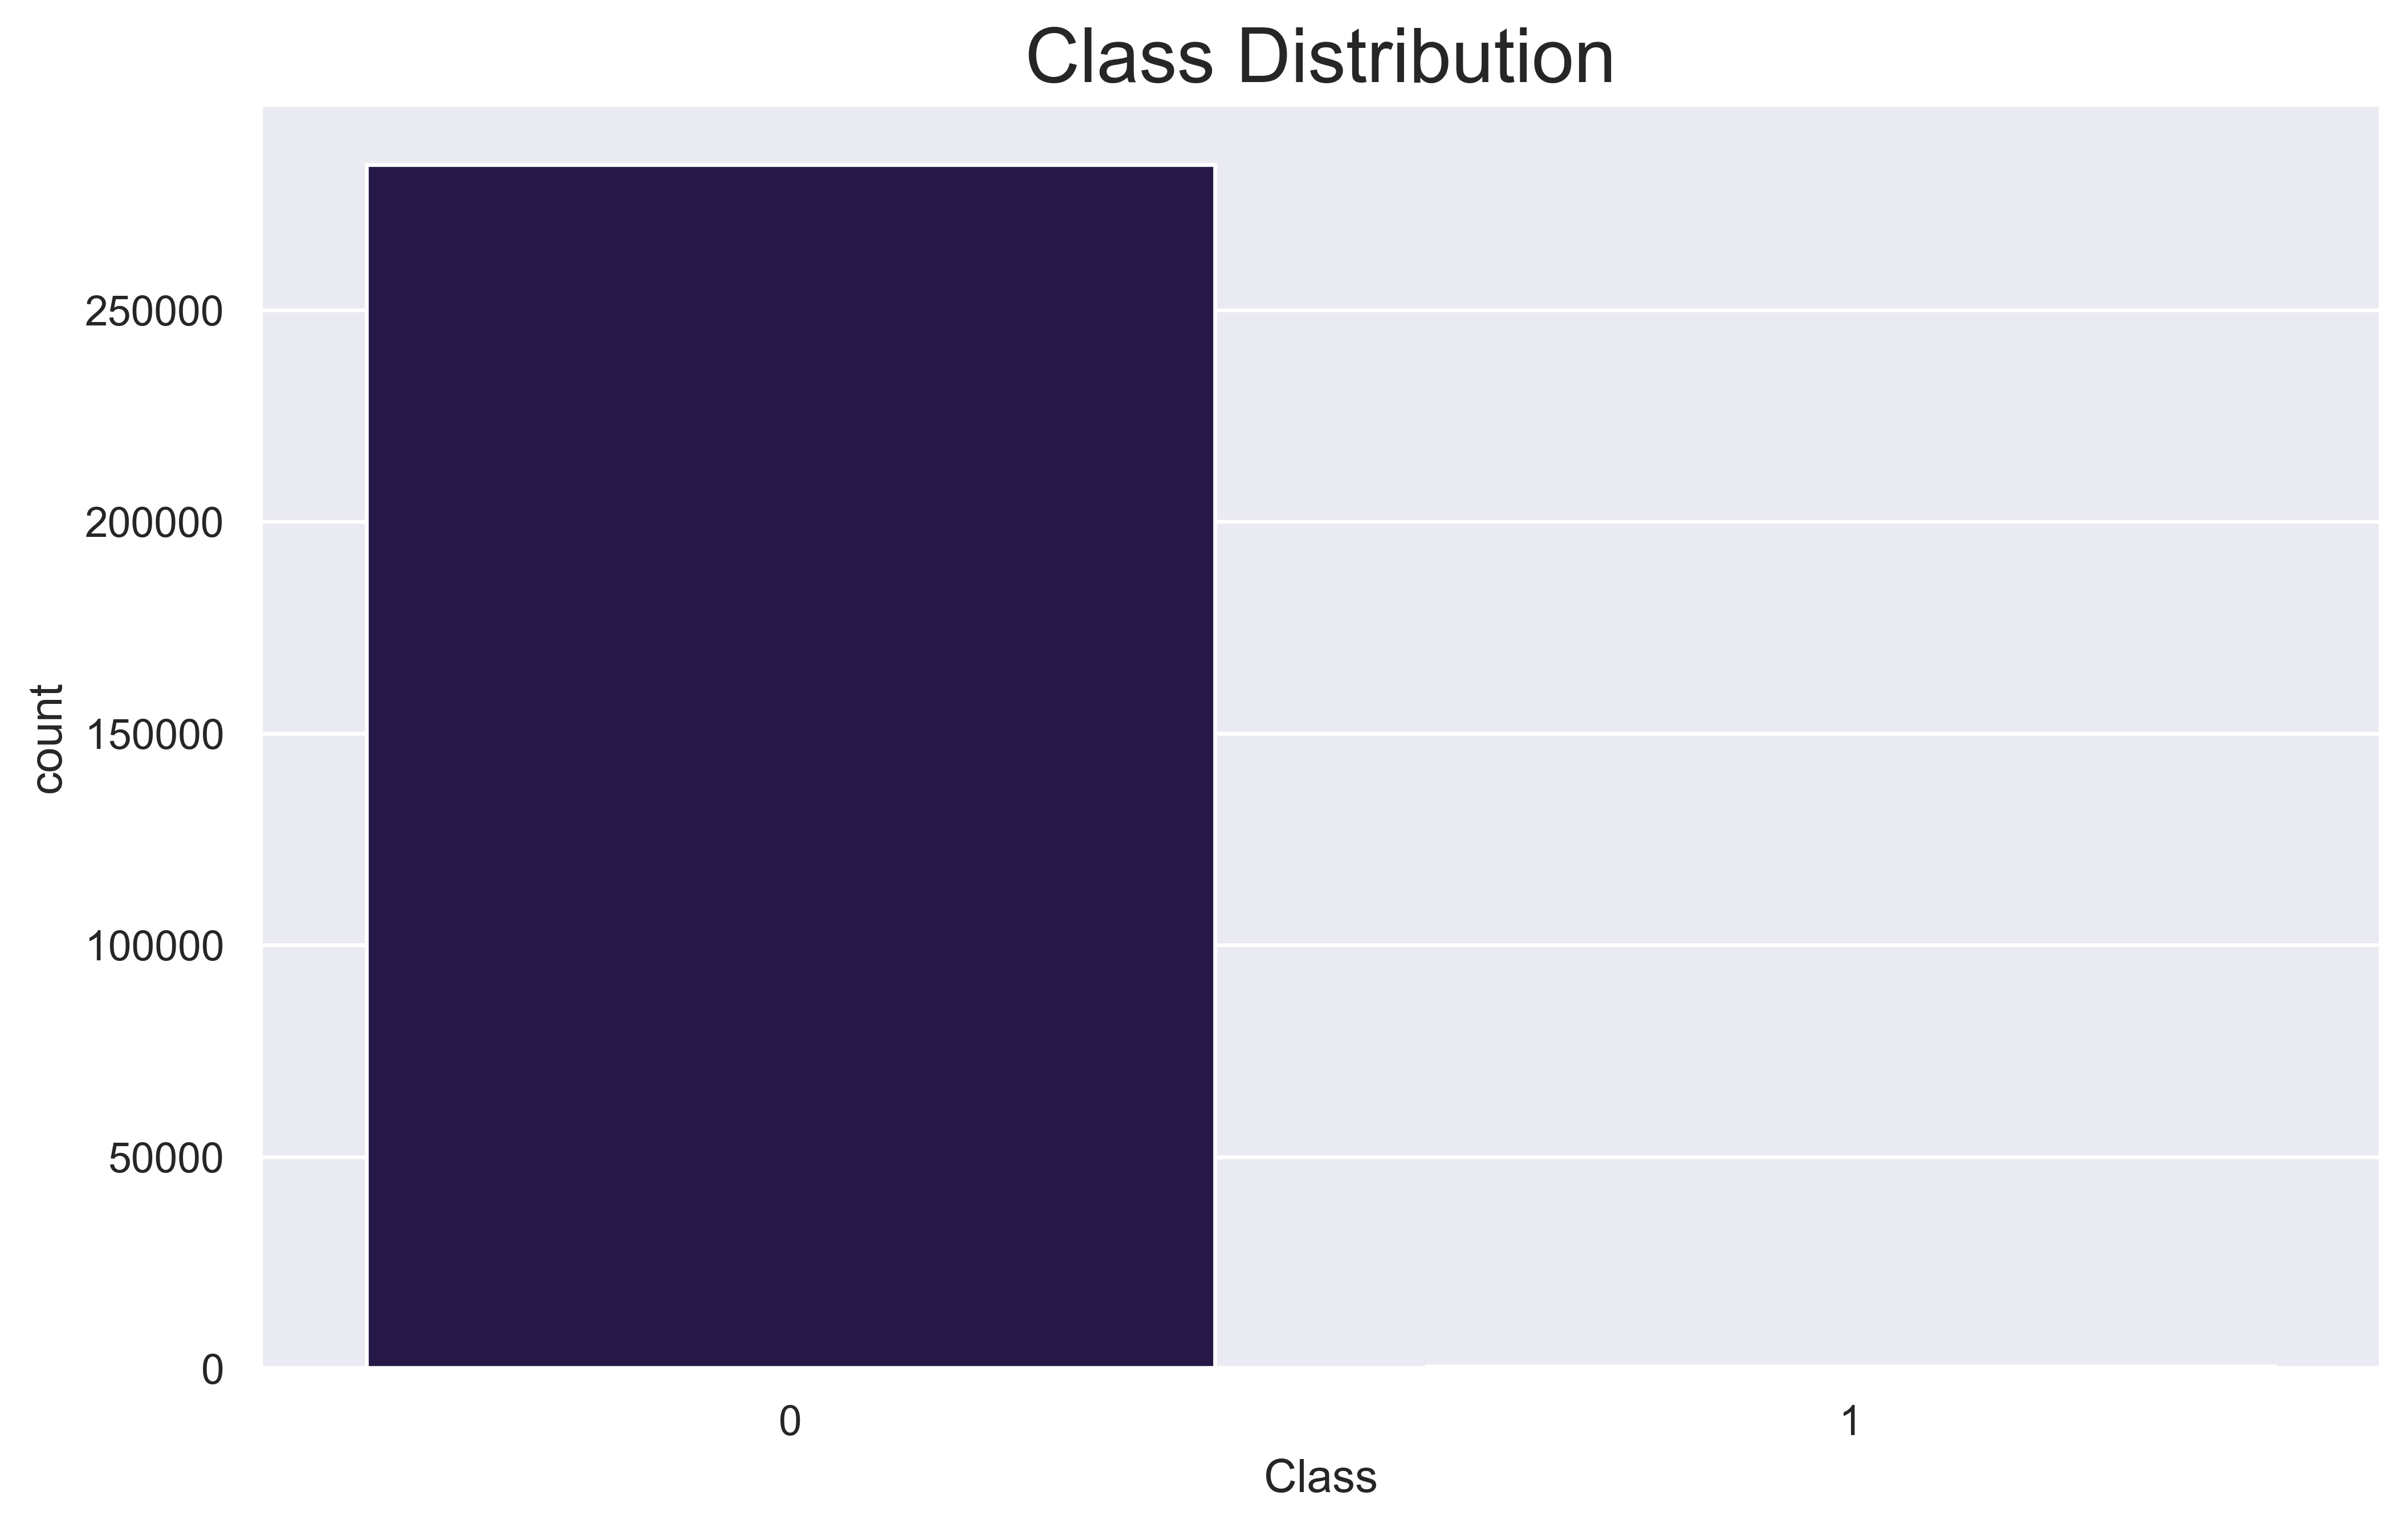

In [85]:
# there seems to be extreme clas imbalance

# defaults for visuals
sns.set_theme(style="darkgrid", palette="magma")
plt.rcParams.update({
    'figure.figsize': (10,6),
    'figure.dpi': 480,
    'axes.titlesize':20
})

# visualize class imbalance
sns.countplot(x="Class", data= df)
plt.title("Class Distribution")
plt.show()

> Observation:
- Extreme Class Imbalance
- Let's move on without fixing the class imbalance

### Modeling
- Choose a model
- we are defining all the models we will use

In [108]:
# Modeling
logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
knnc = KNeighborsClassifier()

# Modeling Pipeline
models = {
    'Logistic Regression' : LogisticRegression(max_iter= 1000),
    "Decision Tree" : DecisionTreeClassifier(criterion="gini"),
    "Random Forest" : RandomForestClassifier(),
    "SVM" : SVC(probability= True),
    "KNN" : KNeighborsClassifier()
}

### Training
- Feature Selection
- Train Test Split
- Fit data into model

In [ ]:
# select the y target feature here
X = df.drop('Class', axis=1)
y = df.Class

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y # preserves the ratio of fraud:no fraud in data
)

In [97]:
# print(y_train.value_counts())
# print(y_test.value_counts())

In [96]:
# Train the models
logreg.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)
svc.fit(X_train,y_train)
knnc.fit(X_train,y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### Testing 
- we test all the models
- what metric do you test them on?
- `f1 score` as the metric

In [ ]:
# train and then Test models

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:,1]
    
    results[name] = {
        "f1 score": f1_score(y_test, preds),
        "Accuracy" : accuracy_score(y_test, preds),
        "Precision" : precision_score(y_test, preds),
        "ROC_AUC" : roc_auc_score(y_test, probs)
    }   

In [ ]:
results_df = pd.DataFrame(results) #.sort_values(by="f1 score")

In [98]:
# make predictions
pred_lr = logreg.predict(X_test)
pred_dtc = dtc.predict(X_test)
pred_rfc = rfc.predict(X_test)
pred_svc = svc.predict(X_test)
pred_knnc = knnc.predict(X_test)

In [100]:
# print the accuracy
print("LR: ",f1_score(y_test, pred_lr))
print("DT: ",f1_score(y_test, pred_dtc))
print("RF: ",f1_score(y_test, pred_rfc))
print("SVM: ",f1_score(y_test, pred_svc))
print("KNN: ",f1_score(y_test, pred_knnc))

LR:  0.7263681592039801
DT:  0.7309644670050761
RF:  0.8743169398907104
SVM:  0.0
KNN:  0.0594059405940594


- Atleast for Fraud detection, if you are getting f1 scores of > 60, that is a good score
- Because data is highly imbalanced
- If the score is 0 ---> our model is making no correct predictions of the positive sample i.e frauds
- SVM --> it is highly suceptible to severe class imbalance
    - if you have a distribution like, most of the records for one class, and almost none for the other, SVM will show 0 as outcome
    - 
```
LR:  0.7263681592039801
DT:  0.7309644670050761
RF:  0.8743169398907104
SVM:  0.0
KNN:  0.0594059405940594`

### Improve Model Performance:
- What can be fixed with the DATA 
    - majority of the problems will be fixed with fixing the data
    - data cleaning, remove any extra noise, duplicates, outliers, fix data imbalance
- Feature engineering
    - generate new features, scale exisisting one
    - feature selection, select only the important ones
    - dimensionality reduction - 
- **Hypterparameter Tuning** - our focus
    - helps us tune our models, based on our requirement
    - hyperparameters are things you can change with models
    - performance alters as well. 

In [104]:
rfc = RandomForestClassifier(
    n_estimators = 100, # number of trees ---> the more the better, but also, slower
    # there is a general sweetspot around 100
    criterion = "gini", # helps the decision tree decide the split
    # gini is fast, entropy is sligtly less computationally intensive
    max_depth = 15, # sweet spot will be 10 to 20
    # how much do you want each tree to grow
    max_features= 'sqrt' # "auto", "sqrt", "log2"
    # Number of features to consider for the best split.
)
# we know that RFC is a ensemble of Decision Trees

rfc.fit(X_train,y_train)

pred_rfc = rfc.predict(X_test)
print("RF: ",f1_score(y_test, pred_rfc))

RF:  0.8681318681318682


> Observation:
- These are like knobs that you turn, to get the best results
- we might not know what the best parameters will be, but we can test a couple out
- We need for that Grid Search

### Hyperparameter tuning
- It will help us find the best parameters for our model
- Grid Search, we use
- 

In [105]:
# define a paramter grid
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
}

In [107]:
grid = GridSearchCV(
    estimator= rfc,
    param_grid = param_grid,
    cv = 5,
    scoring = 'f1',
    n_jobs = 1    
)

grid.fit(X_train, y_train)

# can try later, using RandomizedSearchCV

KeyboardInterrupt: 

In [ ]:
final_model = grid.best_estimator_ # best parameters
best_score = grid.best_score_ # gives you the best achieved f1 score



In [ ]:
# save final predictions
final_preds = final_model.predict(X_test)

#### Understand Stratify

In [90]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)

iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

iris_df['class'].value_counts()

# select the y target feature here
y = iris_df['class']
X = iris_df.drop('class', axis=1)


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8, 
                                                   random_state=None, 
                                                   shuffle=True, stratify=None)

print(y_train.value_counts())
print(y_test.value_counts())

class
2    41
0    40
1    39
Name: count, dtype: int64
class
1    11
0    10
2     9
Name: count, dtype: int64


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8, 
                                                   random_state=None, 
                                                   shuffle=True, stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())

class
1    40
2    40
0    40
Name: count, dtype: int64
class
0    10
2    10
1    10
Name: count, dtype: int64


- `Stratify` - made sure, that, whatever was the class distribution of original data, is reflected after the train test split as well
- It is the Proportional Split 
- Each class will get the representation, as it was represented in the original data
- What is the benefit? In 'y' each class gets proportionate representation, 
- even if data was balanced, train test split could have missed on the equal representation of classes. Stratify fixes that. 